In [6]:
import pandas as pd
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import numpy as np
pd.options.display.max_columns = 999
pd.options.display.max_rows = 8000
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
du = pd.read_csv('~/Downloads/csv_pus/psam_pusa.csv',nrows=10)

In [3]:
du.head()

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,COW,DDRS,DEAR,DEYE,DOUT,DPHY,DRAT,DRATX,DREM,ENG,FER,GCL,GCM,GCR,HINS1,HINS2,HINS3,HINS4,HINS5,HINS6,HINS7,INTP,JWMNP,JWRIP,JWTR,LANX,MAR,MARHD,MARHM,MARHT,MARHW,MARHYP,MIG,MIL,MLPA,MLPB,MLPCD,MLPE,MLPFG,MLPH,MLPI,MLPJ,MLPK,NWAB,NWAV,NWLA,NWLK,NWRE,OIP,PAP,RELP,RETP,SCH,SCHG,SCHL,SEMP,SEX,SSIP,SSP,WAGP,WKHP,WKL,WKW,WRK,YOEP,ANC,ANC1P,ANC2P,DECADE,DIS,DRIVESP,ESP,ESR,FOD1P,FOD2P,HICOV,HISP,INDP,JWAP,JWDP,LANP,MIGPUMA,MIGSP,MSP,NAICSP,NATIVITY,NOP,OC,OCCP,PAOC,PERNP,PINCP,POBP,POVPIP,POWPUMA,POWSP,PRIVCOV,PUBCOV,QTRBIR,RAC1P,RAC2P,RAC3P,RACAIAN,RACASN,RACBLK,RACNH,RACNUM,RACPI,RACSOR,RACWHT,RC,SCIENGP,SCIENGRLP,SFN,SFR,SOCP,VPS,WAOB,FAGEP,FANCP,FCITP,FCITWP,FCOWP,FDDRSP,FDEARP,FDEYEP,FDISP,FDOUTP,FDPHYP,FDRATP,FDRATXP,FDREMP,FENGP,FESRP,FFERP,FFODP,FGCLP,FGCMP,FGCRP,FHICOVP,FHINS1P,FHINS2P,FHINS3C,FHINS3P,FHINS4C,FHINS4P,FHINS5C,FHINS5P,FHINS6P,FHINS7P,FHISP,FINDP,FINTP,FJWDP,FJWMNP,FJWRIP,FJWTRP,FLANP,FLANXP,FMARP,FMARHDP,FMARHMP,FMARHTP,FMARHWP,FMARHYP,FMIGP,FMIGSP,FMILPP,FMILSP,FOCCP,FOIP,FPAP,FPERNP,FPINCP,FPOBP,FPOWSP,FPRIVCOVP,FPUBCOVP,FRACP,FRELP,FRETP,FSCHGP,FSCHLP,FSCHP,FSEMP,FSEXP,FSSIP,FSSP,FWAGP,FWKHP,FWKLP,FWKWP,FWRKP,FYOEP,PWGTP1,PWGTP2,PWGTP3,PWGTP4,PWGTP5,PWGTP6,PWGTP7,PWGTP8,PWGTP9,PWGTP10,PWGTP11,PWGTP12,PWGTP13,PWGTP14,PWGTP15,PWGTP16,PWGTP17,PWGTP18,PWGTP19,PWGTP20,PWGTP21,PWGTP22,PWGTP23,PWGTP24,PWGTP25,PWGTP26,PWGTP27,PWGTP28,PWGTP29,PWGTP30,PWGTP31,PWGTP32,PWGTP33,PWGTP34,PWGTP35,PWGTP36,PWGTP37,PWGTP38,PWGTP39,PWGTP40,PWGTP41,PWGTP42,PWGTP43,PWGTP44,PWGTP45,PWGTP46,PWGTP47,PWGTP48,PWGTP49,PWGTP50,PWGTP51,PWGTP52,PWGTP53,PWGTP54,PWGTP55,PWGTP56,PWGTP57,PWGTP58,PWGTP59,PWGTP60,PWGTP61,PWGTP62,PWGTP63,PWGTP64,PWGTP65,PWGTP66,PWGTP67,PWGTP68,PWGTP69,PWGTP70,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2017000000016,6,1,2500,3,1,1011189,206,73,1,NaN,NaN,2.0,2,2,2.0,1.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,2,2,1,2,2,2,2,0.0,NaN,NaN,NaN,2.0,4,2.0,2.0,1.0,2.0,1979.0,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,2.0,2.0,3.0,0.0,0.0,0,0.0,1,NaN,10,0.0,1,0.0,10000.0,0.0,NaN,3.0,NaN,2.0,NaN,1,902,999,NaN,1,NaN,NaN,6.0,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1,NaN,0,NaN,NaN,0.0,10000.0,1,85,NaN,NaN,2,1,4,2,2,2,0,0,1,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,240,225,300,297,326,327,164,234,235,62,268,419,90,241,193,72,142,77,246,78,276,184,276,196,272,244,188,269,201,68,304,360,65,145,185,78,239,93,251,283,199,211,63,230,84,186,280,83,225,242,76,57,356,283,206,320,157,280,224,285,200,168,70,179,72,140,306,120,193,261,60,46,260,300,256,370,366,293,250,62
1,P,2017000000031,6,1,1800,3,1,1011189,45,31,1,NaN,1.0,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,1,2,2,2,2,2,2,0.0,50.0,1.0,1.0,2.0,5,NaN,NaN,NaN,NaN,NaN,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0,0.0,1,NaN,21,0.0,2,0.0,0.0,38500.0,42.0,1.0,1.0,1.0,NaN,2,917,50,NaN,2,1.0,NaN,1.0,6100.0,NaN,1,1,8090.0,88.0,39.0,NaN,NaN,NaN,6.0,6214.0,1,NaN,0,350.0,4.0,38500.0,38500.0,13,302,1200.0,1.0,1,2,1,1,1,1,0,0,0,0,1,0,0,1,0,2.0,1.0,NaN,NaN,119111.0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,48,41,55,23,30,14,55,14,16,11,11,38,68,15,12,49,13,19,67,116,74,72,95,40,79,39,61,34,48,60,49,76,51,41,47,106,49,26,56,36,31,34,48,47,39,68,48,80,62,49,141,77,71,57,63,45,63,108,13,11,16,20,19,55,19,34,17,58,36,55,31,11,19,43,103,14,49,49,98
2,P,2017000000061,6,1,2400,3,1,1011189,136,41,1,NaN,1.0,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1,1,2,1,2,2,2,10000.0,45.0,1.0,1.0,2.0,1,2.0,2.0,2.0,2.0,2000.0,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0,0.0,1,NaN,17,0.0,1,0.0,0.0,72000.0,42.0,1.0,1.0,1.0,NaN,1,210,999,NaN,2,1.0,NaN,1.0,NaN,NaN,1,2,770

In [7]:
d = pd.concat([
    pd.read_csv('~/Downloads/csv_pus/psam_pus%s.csv' % (v,),
                usecols=['PWGTP','PUMA','ST','AGEP','RAC1P','SEX','MAR',
                         'SCHL','PINCP','WKW','WKHP']) for v in ('a','b')])

In [3]:
d.shape

(3190040, 11)

In [4]:
d.PWGTP.sum()

325719178

In [5]:
d.head()

,PUMA,ST,PWGTP,AGEP,MAR,SCHL,SEX,WKHP,WKW,PINCP,RAC1P
0,2500,1,206,73,4,10.0,1,NaN,NaN,10000.0,2
1,1800,1,45,31,5,21.0,2,42.0,1.0,38500.0,1
2,2400,1,136,41,1,17.0,1,42.0,1.0,82000.0,1
3,2400,1,121,48,1,16.0,2,NaN,NaN,8700.0,1
4,2400,1,111,16,5,13.0,1,NaN,NaN,0.0,1


In [19]:
d.PWGTP.isnull().sum()

0

In [20]:
d.PUMA.isnull().sum()

0

In [21]:
d.ST.isnull().sum()

0

In [22]:
grouped = d.groupby(['PUMA','ST'])

In [23]:
len(grouped)

2351

In [26]:
grouped.PWGTP.sum().sort_values(ascending=False)

PUMA   ST
500    12    296533
900    40    279195
100    5     265900
4103   36    260341
5904   6     253242
51246  51    251287
4112   36    249054
400    54    239801
110    6     238706
100    15    238360
7703   6     233734
408    32    232117
200    5     232007
4905   48    231777
411    32    229615
500    4     228324
5708   12    227949
3300   13    227889
51154  51    227888
51235  51    226771
600    4     226536
2600   47    226180
1204   45    225561
10200  53    225502
300    10    225203
1000   19    224036
20000  55    223248
3602   48    223018
2902   6     221611
10100  53    221507
              ...  
8620   12     99031
100    23     98960
600    17     98773
3312   36     98744
2003   42     98611
200    56     98601
907    39     98569
1200   28     98524
5904   48     98352
1601   40     98098
4002   42     98089
1104   34     98008
57002  49     97921
1300   39     97525
3769   6      97375
200    35     97249
1300   54     97049
1703   26     96793
206    4  

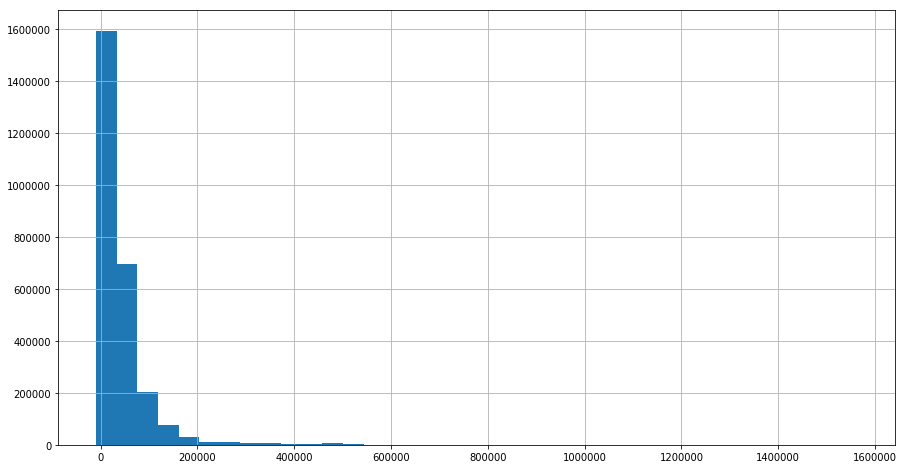

In [5]:
d['PINCP'].hist(bins=37,figsize=(15,8));

In [6]:
not_null_income_mask = d.PINCP.notnull()

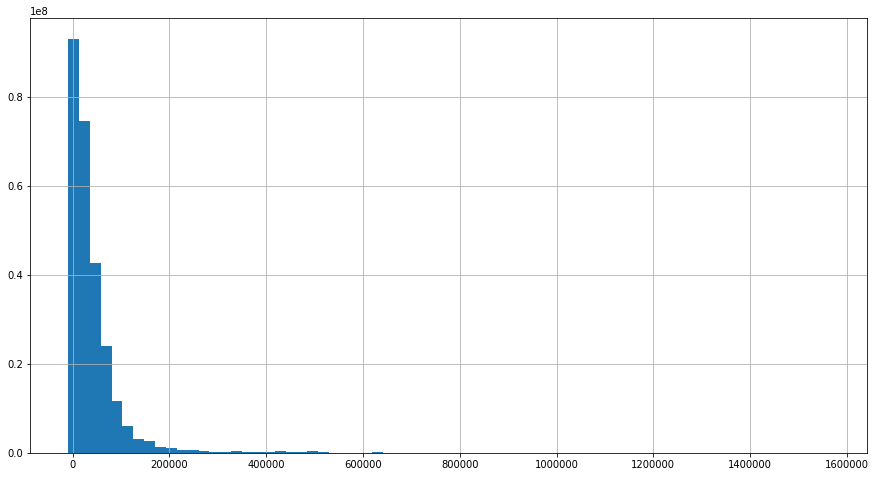

In [7]:
d.loc[not_null_income_mask,'PINCP'].hist(bins=70,figsize=(15,8),weights=d.loc[not_null_income_mask,'PWGTP']);

In [8]:
density = KernelDensity(bandwidth=2.2)
density.fit(d.AGEP.sample(frac=.6).values.reshape(-1, 1))

KernelDensity(algorithm='auto', atol=0, bandwidth=2.2, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

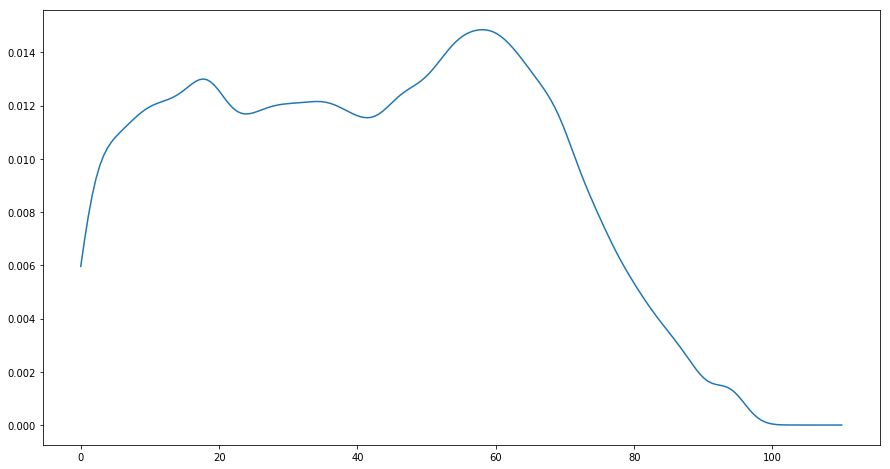

In [9]:
xs = np.linspace(0,110,200)
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(xs,np.exp(density.score_samples(xs.reshape(-1, 1))));

In [10]:
density = KernelDensity(bandwidth=2.2)
sample = d.sample(frac=.6)
density.fit(sample.AGEP.values.reshape(-1, 1),sample_weight=sample.PWGTP)

KernelDensity(algorithm='auto', atol=0, bandwidth=2.2, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

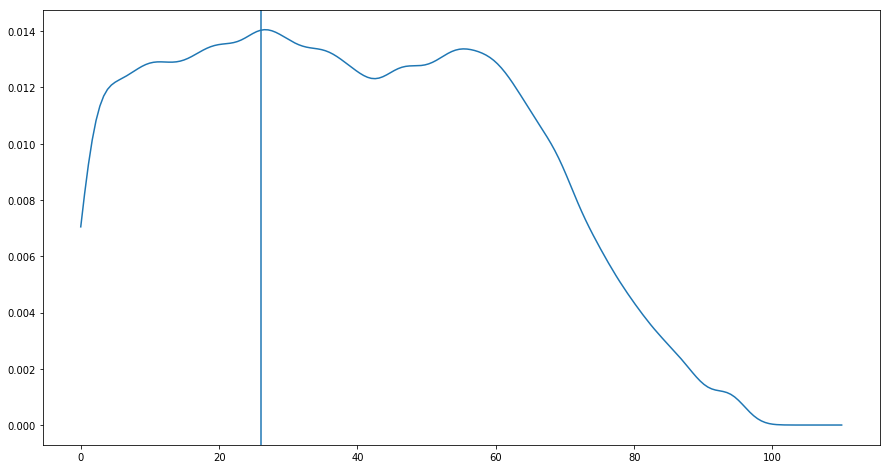

In [11]:
xs = np.linspace(0,110,200)
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(xs,np.exp(density.score_samples(xs.reshape(-1, 1))));
plt.axvline(x=26);

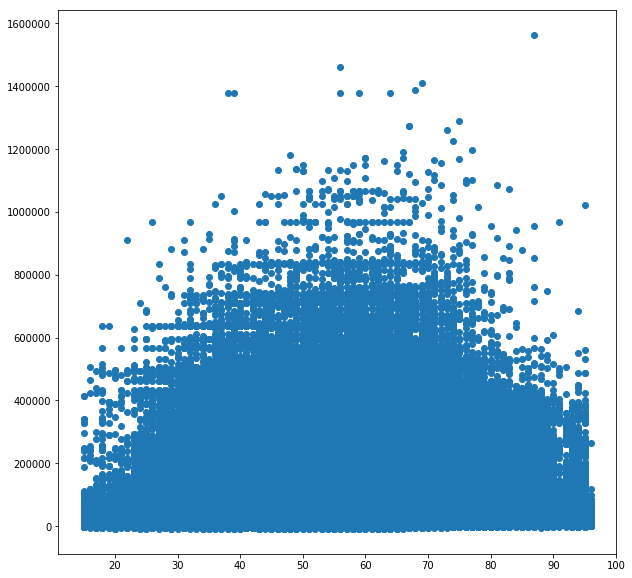

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(d.loc[not_null_income_mask,'AGEP'],
            d.loc[not_null_income_mask,'PINCP']);

In [57]:
d.loc[(not_null_income_mask) & (d.AGEP<18),'PINCP'].describe()

count    121110.000000
mean       1288.106127
std        6464.066610
min       -6600.000000
25%           0.000000
50%           0.000000
75%         500.000000
max      506000.000000
Name: PINCP, dtype: float64

## Transforming:

### Age

In [8]:
d['age_cat'] = None
d.loc[d.AGEP<=20,'age_cat'] = 'genz'
d.loc[(d.AGEP>20) & (d.AGEP<=36),'age_cat'] = 'millennial'
d.loc[(d.AGEP>36) & (d.AGEP<=52),'age_cat'] = 'genx'
d.loc[(d.AGEP>52) & (d.AGEP<=71),'age_cat'] = 'boomer'
d.loc[d.AGEP>71,'age_cat'] = 'silent'

In [9]:
d.age_cat.isnull().sum()

0

In [10]:
d.groupby('age_cat').PWGTP.sum().sort_values(ascending=False)

age_cat
genz          86947550
boomer        73553226
millennial    71220736
genx          65925527
silent        28072139
Name: PWGTP, dtype: int64

In [11]:
d.head()

,PUMA,ST,PWGTP,AGEP,MAR,SCHL,SEX,WKHP,WKW,PINCP,RAC1P,age_cat
0,2500,1,206,73,4,10.0,1,NaN,NaN,10000.0,2,silent
1,1800,1,45,31,5,21.0,2,42.0,1.0,38500.0,1,millennial
2,2400,1,136,41,1,17.0,1,42.0,1.0,82000.0,1,genx
3,2400,1,121,48,1,16.0,2,NaN,NaN,8700.0,1,genx
4,2400,1,111,16,5,13.0,1,NaN,NaN,0.0,1,genz


### Race

In [12]:
race_map =\
{
    1:'white_alone',
    2:'aa_alone',
    3:'other_alone',
    4:'other_alone',
    5:'other_alone',
    6:'other_alone',
    7:'other_alone',
    8:'other_alone',
    9:'multiple'
}

In [13]:
np.sort(d.RAC1P.unique())

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
d['race_cat'] = d.RAC1P.map(race_map)

In [15]:
d.groupby('race_cat').PWGTP.sum().sort_values(ascending=False)

race_cat
white_alone    235548109
aa_alone        41420756
other_alone     37985841
multiple        10764472
Name: PWGTP, dtype: int64

## Sex

In [16]:
np.sort(d.SEX.unique())

array([1, 2])

In [17]:
sex_map =\
{
    1:'male',
    2:'female'
}

In [18]:
d['sex_cat'] = d.SEX.map(sex_map)

In [19]:
d.groupby('sex_cat').PWGTP.sum().sort_values(ascending=False)

sex_cat
female    165347934
male      160371244
Name: PWGTP, dtype: int64

### Marital Status

In [20]:
np.sort(d.MAR.unique())

array([1, 2, 3, 4, 5])

In [21]:
mar_map =\
{
    1:'married',
    2:'prev_married',
    3:'prev_married',
    4:'prev_married',
    5:'never_married',
}

In [22]:
d['mar_cat'] = d.MAR.map(mar_map)

In [23]:
d.groupby('mar_cat').PWGTP.sum().sort_values(ascending=False)

mar_cat
never_married    149972236
married          126611806
prev_married      49135136
Name: PWGTP, dtype: int64

### Education

In [24]:
np.sort(d.SCHL.unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., nan])

In [25]:
d['edu_cat'] = None
d.loc[d.SCHL<=20,'edu_cat'] = 'no_deg'
d.loc[d.SCHL>20,'edu_cat'] = 'deg'
d.loc[d.SCHL.isnull(),'edu_cat'] = 'no_deg'

In [26]:
d.groupby('edu_cat').PWGTP.sum().sort_values(ascending=False)/d.PWGTP.sum()

edu_cat
no_deg    0.771977
deg       0.228023
Name: PWGTP, dtype: float64

### Neighborhood

In [27]:
area_size = d.groupby(['PUMA','ST']).PWGTP.sum().sort_values(ascending=False)

In [28]:
area_size.head()

PUMA  ST
500   12    296533
900   40    279195
100   5     265900
4103  36    260341
5904  6     253242
Name: PWGTP, dtype: int64

In [29]:
type(area_size)

pandas.core.series.Series

In [30]:
area_size = area_size.to_frame()

In [31]:
area_size.head(3)

,,PWGTP
PUMA,ST,
500,12,296533
900,40,279195
100,5,265900


In [32]:
area_size['running_sum'] = area_size.PWGTP.cumsum()

In [33]:
area_size.head(3)

,,PWGTP,running_sum
PUMA,ST,,
500,12,296533,296533
900,40,279195,575728
100,5,265900,841628


In [34]:
urban_t_cutoff = int(.26*d.PWGTP.sum())
urban_cutoff = area_size.loc[area_size.running_sum<urban_t_cutoff,'running_sum'].max()
suburban_t_cutoff = urban_cutoff + int(.53*d.PWGTP.sum())
suburban_cutoff = area_size.loc[area_size.running_sum<suburban_t_cutoff,'running_sum'].max()

In [35]:
urban_t_cutoff,urban_cutoff

(84686986, 84524728)

In [36]:
suburban_t_cutoff,suburban_cutoff

(257155892, 257081486)

In [37]:
area_size['nei_cat'] = None
area_size.loc[area_size.running_sum<=urban_cutoff,'nei_cat'] = 'urban'
area_size.loc[(area_size.running_sum>urban_cutoff) &
              (area_size.running_sum<=suburban_cutoff),'nei_cat'] = 'suburban'
area_size.loc[area_size.running_sum>suburban_cutoff,'nei_cat'] = 'rural'

In [38]:
area_size.groupby('nei_cat').PWGTP.sum()/d.PWGTP.sum()

nei_cat
rural       0.210727
suburban    0.529772
urban       0.259502
Name: PWGTP, dtype: float64

In [39]:
area_size_map = area_size.nei_cat.to_dict()

In [40]:
d['nei_cat'] = [area_size_map[(puma,st)] for puma,st in d[['PUMA','ST']].values]

In [41]:
d.groupby('nei_cat').PWGTP.sum()/d.PWGTP.sum()

nei_cat
rural       0.210727
suburban    0.529772
urban       0.259502
Name: PWGTP, dtype: float64

### Income

In [42]:
d.PINCP.describe()

count    2.651836e+06
mean     4.083221e+04
std      6.131777e+04
min     -9.100000e+03
25%      8.000000e+03
50%      2.440000e+04
75%      5.100000e+04
max      1.563000e+06
Name: PINCP, dtype: float64

In [43]:
d.PINCP.isnull().sum()

538204

In [44]:
d['income_cat'] = None
d.loc[d.PINCP.isnull(),'income_cat'] = 'no_or_low'
d.loc[d.PINCP<40000,'income_cat'] = 'no_or_low'
d.loc[(d.PINCP>=40000) & (d.PINCP<160000),'income_cat'] = 'middle'
d.loc[d.PINCP>=160000,'income_cat'] = 'high'

In [45]:
d.groupby('income_cat').PWGTP.sum()/d.PWGTP.sum()

income_cat
high         0.023885
middle       0.249883
no_or_low    0.726232
Name: PWGTP, dtype: float64

### Employmenet

In [46]:
d.WKW.isnull().sum(),d.WKHP.isnull().sum()

(1536328, 1536328)

In [47]:
d.WKW.describe()

count    1.653712e+06
mean     1.853504e+00
std      1.594858e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: WKW, dtype: float64

In [48]:
d.WKHP.describe()

count    1.653712e+06
mean     3.812923e+01
std      1.318866e+01
min      1.000000e+00
25%      3.500000e+01
50%      4.000000e+01
75%      4.300000e+01
max      9.900000e+01
Name: WKHP, dtype: float64

In [49]:
d['fempl_cat'] = 'no'
d.loc[(d.WKW.isin([1,2,3])) & (d.WKHP>35),'fempl_cat'] = 'yes'

In [50]:
d.groupby('fempl_cat').PWGTP.sum()/d.PWGTP.sum()

fempl_cat
no     0.648941
yes    0.351059
Name: PWGTP, dtype: float64

In [51]:
d.head()

,PUMA,ST,PWGTP,AGEP,MAR,SCHL,SEX,WKHP,WKW,PINCP,RAC1P,age_cat,race_cat,sex_cat,mar_cat,edu_cat,nei_cat,income_cat,fempl_cat
0,2500,1,206,73,4,10.0,1,NaN,NaN,10000.0,2,silent,aa_alone,male,prev_married,no_deg,urban,no_or_low,no
1,1800,1,45,31,5,21.0,2,42.0,1.0,38500.0,1,millennial,white_alone,female,never_married,deg,suburban,no_or_low,yes
2,2400,1,136,41,1,17.0,1,42.0,1.0,82000.0,1,genx,white_alone,male,married,no_deg,suburban,middle,yes
3,2400,1,121,48,1,16.0,2,NaN,NaN,8700.0,1,genx,white_alone,female,married,no_deg,suburban,no_or_low,no
4,2400,1,111,16,5,13.0,1,NaN,NaN,0.0,1,genz,white_alone,male,never_married,no_deg,suburban,no_or_low,no


In [52]:
5*4*2*3*2*3*3*2

4320

In [53]:
6*5*3*4*3*4*4*3

51840

In [54]:
def get_group_sizes(population,all_the_cats,all_cats_values):
    # key is 8 tuple of indicators,
    # values is dict with tuple of values -> tuple of (# people in group, rank of group)
    group_sizes = {}
    for indicators in itertools.product(*([(False,True)]*8)):
        cats_on = all_the_cats[np.array(indicators)]
        if not len(cats_on):
            continue
        group_sizes[indicators] = {}
        num_groups = 1
        for vals in all_cats_values[np.array(indicators)]:
            num_groups *= len(vals)
        groups = population.groupby(cats_on.tolist()).PWGTP.sum().sort_values(ascending=False).to_frame()
        group_sizes[indicators]['n_populated_groups'] = len(groups)
        group_sizes[indicators]['n_groups'] = num_groups
        groups['grank'] = groups.PWGTP.rank(method='min',ascending=False)
        group_sizes[indicators]['vals'] = {}
        for index, row in groups.iterrows(): ## store results of groups with people
            key = tuple(index)
            value = (row['PWGTP'],row['grank'])
            group_sizes[indicators]['vals'][key] = value
#         for vals in itertools.product(*all_cats_values[np.array(indicators)]):
#             key = tuple([])
#             j = 0
#             for i in indicators:
#                 if i:
#                     key += (vals[j],)
#                     j += 1
#                 else:
#                     key += (None,)
#             if key in group_sizes[indicators]['vals']:
#                 continue
#             value = (0,len(groups)+1)
#             group_sizes[indicators]['vals'][key] = value
    return group_sizes

all_the_cats = np.array(['age_cat','race_cat','sex_cat','mar_cat',
                         'edu_cat','nei_cat','income_cat','fempl_cat'])
all_cats_values = np.array([('genz','millennial','genx','boomer','silent'),
                   ('white_alone','aa_alone','other_alone','multiple',),
                   ('male','female'),
                   ('married','prev_married','never_married',),
                   ('no_deg','deg'),
                   ('urban','suburban','rural'),
                   ('no_or_low','middle','high'),
                   ('yes','no')])
group_sizes_with_z = get_group_sizes(d,all_the_cats,all_cats_values)

all_cats_values_sans_z = np.array([('millennial','genx','boomer','silent'),
           ('white_alone','aa_alone','other_alone','multiple',),
           ('male','female'),
           ('married','prev_married','never_married',),
           ('no_deg','deg'),
           ('urban','suburban','rural'),
           ('no_or_low','middle','high'),
           ('yes','no')])
sub = d[d['age_cat']!='genz']
group_sizes_without_z = get_group_sizes(sub,all_the_cats,all_cats_values_sans_z)


In [55]:
len(group_sizes_with_z),len(group_sizes_without_z)

(255, 255)

In [66]:
list(group_sizes_with_z[(True,False,False,False,False,True,False,False)].items())

[('n_populated_groups', 15),
 ('n_groups', 15),
 ('vals',
  {('genz', 'suburban'): (46255443.0, 1.0),
   ('boomer', 'suburban'): (38536735.0, 2.0),
   ('millennial', 'suburban'): (37962061.0, 3.0),
   ('genx', 'suburban'): (35193642.0, 4.0),
   ('genz', 'urban'): (22792359.0, 5.0),
   ('boomer', 'urban'): (18832728.0, 6.0),
   ('millennial', 'urban'): (18719241.0, 7.0),
   ('genz', 'rural'): (17899748.0, 8.0),
   ('genx', 'urban'): (17014973.0, 9.0),
   ('boomer', 'rural'): (16183763.0, 10.0),
   ('silent', 'suburban'): (14608877.0, 11.0),
   ('millennial', 'rural'): (14539434.0, 12.0),
   ('genx', 'rural'): (13716912.0, 13.0),
   ('silent', 'urban'): (7165427.0, 14.0),
   ('silent', 'rural'): (6297835.0, 15.0)})]

In [67]:
d = group_sizes_with_z[(True,False,False,False,False,True,False,False)]
d['vals'] = list(d['vals'].items())
list(d.items())

[('n_populated_groups', 15),
 ('n_groups', 15),
 ('vals',
  [(('genz', 'suburban'), (46255443.0, 1.0)),
   (('boomer', 'suburban'), (38536735.0, 2.0)),
   (('millennial', 'suburban'), (37962061.0, 3.0)),
   (('genx', 'suburban'), (35193642.0, 4.0)),
   (('genz', 'urban'), (22792359.0, 5.0)),
   (('boomer', 'urban'), (18832728.0, 6.0)),
   (('millennial', 'urban'), (18719241.0, 7.0)),
   (('genz', 'rural'), (17899748.0, 8.0)),
   (('genx', 'urban'), (17014973.0, 9.0)),
   (('boomer', 'rural'), (16183763.0, 10.0)),
   (('silent', 'suburban'), (14608877.0, 11.0)),
   (('millennial', 'rural'), (14539434.0, 12.0)),
   (('genx', 'rural'), (13716912.0, 13.0)),
   (('silent', 'urban'), (7165427.0, 14.0)),
   (('silent', 'rural'), (6297835.0, 15.0))])]

In [59]:
list(group_sizes_without_z[(True,False,False,False,False,True,False,False)]['vals'].values())

[(46255443.0, 1.0),
 (38536735.0, 2.0),
 (37962061.0, 3.0),
 (35193642.0, 4.0),
 (22792359.0, 5.0),
 (18832728.0, 6.0),
 (18719241.0, 7.0),
 (17899748.0, 8.0),
 (17014973.0, 9.0),
 (16183763.0, 10.0),
 (14608877.0, 11.0),
 (14539434.0, 12.0),
 (13716912.0, 13.0),
 (7165427.0, 14.0),
 (6297835.0, 15.0)]

In [52]:
len(group_sizes_with_z),len(group_sizes_without_z)

(51839, 43199)

In [2]:
import pickle

In [56]:
import pickle
with open('pumas_out.pkl','wb') as f:
    pickle.dump({'with_z':group_sizes_with_z,'without_z':group_sizes_without_z},f)

In [60]:
group_sizes_without_z[('genx',None,'male','married','deg','suburban','middle',None)]

(2824336.0, 16.0, 432, 432)

In [59]:
group_sizes_with_z[('genx',None,'male','married','deg','suburban','middle',None)]

(2824336.0, 22.0, 507, 540)

In [81]:
groups.PWGTP.rank(method='min',ascending=False)

fempl_cat
no     1.0
yes    2.0
Name: PWGTP, dtype: float64

In [83]:
groups.PWGTP.rank(method='min',ascending=True,pct=True)

fempl_cat
no     1.0
yes    0.5
Name: PWGTP, dtype: float64

In [84]:
groups['grank'] = groups.PWGTP.rank(method='min',ascending=False)

In [87]:
groups['gpct'] = (groups['grank']-1)/len(groups)

In [88]:
groups

,PWGTP,grank,gpct
fempl_cat,,,
no,211372667,1.0,0.0
yes,114346511,2.0,0.5


In [57]:
import pickle
with open('pumas_out.pkl','rb') as f:
    d = pickle.load(f)

In [64]:
for m in d['with_z'].values():
    n = sum(f[0] for f in m['vals'].values())
    #print(n)
    if n!=325719178:
        print('oh no')
for m in d['without_z'].values():
    n = sum(f[0] for f in m['vals'].values())
    #print(n)
    if n!=238771628:
        print('oh no')

In [73]:
p = d['with_z'][(True,True,True,True,True,True,True,True)]

In [74]:
p['vals'] = [[list(key),list(value)] for key,value in p['vals'].items()]

In [76]:
import json

In [77]:
with open('j.json','w') as f:
    json.dump([[key,value] for key,value in p.items()],f)